In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = np.loadtxt('./dataset.txt')

# 10 Armed bandit 
https://github.com/akhadangi/Multi-armed-Bandits/blob/master/Multi-armed%20Bandits.ipynb

In [55]:
arms = data[:,0]
rewards = data[:,1]
contexts = data[:,2:102]

In [56]:
arm_rewards = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

In [57]:
for i, arm in enumerate(arms):
    arm_rewards[int(arm)-1].append(int(rewards[i]))

In [60]:
for arm, rewards in arm_rewards.items():
    print(f"======== ARM {arm} =========")
    print(f"Average reward {round(np.mean(rewards), 2)}\n")
    # plt.hist(rewards)
    # plt.show()

======== ARM 0 =========
Average reward 0.02

======== ARM 1 =========
Average reward 0.27

======== ARM 2 =========
Average reward 0.14

======== ARM 3 =========
Average reward 0.05

======== ARM 4 =========
Average reward 0.05

======== ARM 5 =========
Average reward 0.1

======== ARM 6 =========
Average reward 0.19

======== ARM 7 =========
Average reward 0.03

======== ARM 8 =========
Average reward 0.16

======== ARM 9 =========
Average reward 0.03



# Epsilon Greedy

Average Reward earned in 1000 steps = 0.26626626626626626 


/Users/bala-11402/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


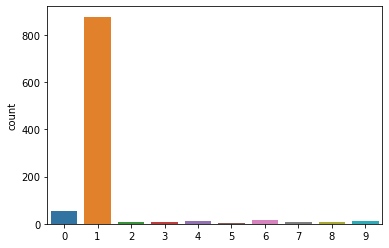

In [134]:
epsilon = 0.1
rewards = np.array([0.]*10)
n_steps = 1000
reward_history = []
choice_history = []
choices_n = [1] * 10
cumulative_reward = []

for i in range(1, n_steps):
    if np.random.rand() > epsilon: # Greedy - Exploit
        choice = rewards.argmax()
        r = np.random.choice(arm_rewards[choice])

    else: # Explore
        choice = np.random.choice(np.arange(len(arm_rewards)))
        r = np.random.choice(arm_rewards[choice])
    


    choices_n[choice] +=1
    rewards[choice] += (r - rewards[choice])/choices_n[choice]
    
    reward_history.append(r)
    choice_history.append(int(choice))
    cumulative_reward.append(np.mean(reward_history))
    
    #print(rewards)
                                    
sns.countplot(choice_history)  
print(f"Average Reward earned in 1000 steps = {np.mean(reward_history)} ")

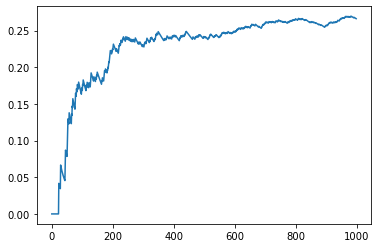

In [135]:
plt.plot(cumulative_reward)

# Epsilon Greedy with decay

# Optimistic Initial Values

# Upper-Confidence_Bound Action Selection

# Contextual Bandits